In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import copy 

import seaborn as sns
sns.set(color_codes=True)

from copy import copy
from scipy.spatial.distance import jensenshannon as JSD 

from scipy.stats import entropy as DKL

/home/acevedo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
ds_training = pd.read_csv('resources/dataset_training.csv', header=None) .values
ds_gan = pd.read_csv('resources/dataset_gan.csv', header=None) .values
ds_malo = pd.read_csv('resources/dataset_deformado.csv', header=None) .values


In [3]:
species_k = ds_gan[:,5]
ds_gan.shape

(10000, 100)

In [4]:
def data_probs(ds):
    hist, bin_edges = np.histogram(ds, density=True)

    probs = hist * np.diff(bin_edges)
    return probs

In [5]:
k = 8 

a = data_probs(ds_gan[:,k])
b = data_probs(ds_malo[:,k])
c = data_probs(ds_training[:,k])

print(DKL(a,c))
print(DKL(b,c))

0.027216472328301843
0.8262911978380284


10
11


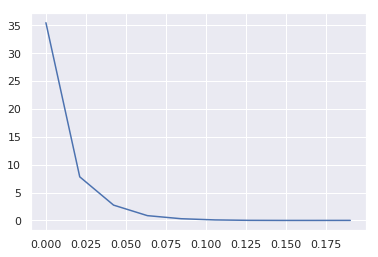

In [10]:
hist, bin_edges = np.histogram(ds_training[:,k], density=True)
print(len(hist))
print(len(bin_edges))
plt.plot(bin_edges[0:-1], hist)

In [12]:
np.trapz(hist, x= bin_edges[0:-1])

0.62535

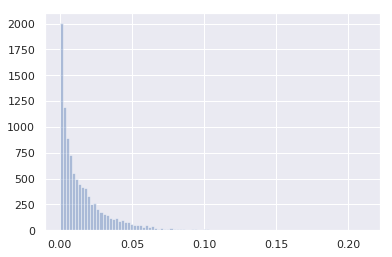

In [19]:
sns.distplot(ds_training[:,k],kde=False ,bins = 100)

# Visualizamos Histograms Especies

# GAN y Training

In [ ]:
# Sugerencia, usar especie 8
k_esp = 8# np.random.randint(0,100)


sns.distplot(ds_training[:,k_esp], kde=False,label='Real') 
sns.distplot(ds_gan[:,k_esp],kde=False, label='GAN') 
plt.title("Especie "+str(k_esp))
plt.legend()

a1 = DKL(ds_gan[:,k_esp],ds_training[:,k_esp])
a2 = DKL(ds_malo[:,k_esp],ds_training[:,k_esp])
print("DKL(GAN, Training)= "+str(a1)+" para especie: "+str(k_esp)) 

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


# Training y Dataset Deformado

In [ ]:
 
sns.distplot(ds_training[:,k_esp],kde=False, label='Real') 
sns.distplot(ds_malo[:,k_esp],kde=False, label='Dataset Deformado') 
plt.title("Especie "+str(k_esp))
plt.legend()

a2 = DKL(ds_malo[:,k_esp],ds_training[:,k_esp])

print("DKL(Dataset Deformado, Training)="+str(a2)+" para especie: "+str(k_esp))


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


# GAN, Training y Dataset Deformado

In [ ]:

sns.distplot(ds_training[:,k_esp],kde=False,  label='Real') 
sns.distplot(ds_gan[:,k_esp],kde=False,label='GAN') 
sns.distplot(ds_malo[:,k_esp],kde=False,  label='Dataset Deformado') 
plt.title("Especie "+str(k_esp))
plt.legend()

a1 = DKL(ds_gan[:,k_esp],ds_training[:,k_esp])
a2 = DKL(ds_malo[:,k_esp],ds_training[:,k_esp])
print("DKL(GAN, Training)="+str(a1)+" para especie: "+str(k_esp))
print("DKL(Dataset Deformado, Training)="+str(a2)+" para especie: "+str(k_esp))
print("DKL(GAN, Training) < JSD(Dataset Deformado, Training) :"+str(a1 <a2))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


In [ ]:
bool_arr1 = DKL(ds_gan, ds_training) < DKL(ds_malo, ds_training)
bool_arr2 = JSD(ds_gan, ds_training) < JSD(ds_malo, ds_training)

print(bool_arr1.sum())
print(bool_arr2.sum())


# Buscar en que indices DKL  para un especie es infinito

In [ ]:
temp = DKL(ds_gan, ds_training) #  > 1e8
n_inf = np.sum(temp == np.inf)
print("Hay "+str(n_inf)+" infinitos en el vector DKL de las especies") # Vemos 
record = []

for k in range(len(temp)):
    if temp[k] >1e8:
        record.append(k)
print("Indices "+str(record))

#el problema es probablemente un cero
for k in range(len(record)):
    print("\n")
    print("Valor miminimo (GAN )para la especie "+str(record[k])+" =>"+str(ds_gan[:,k].min()))
    print("Valor miminimo (Training) para la especie "+str(record[k])+"=> "+str(ds_training[:,k].min()))

## Probamos JSD en esos indices problematicos

In [ ]:
for k in range(len(record)):

    print(JSD(ds_gan[:,record[k]], ds_training[:,record[k]]))

Por lo que utilizaremos JSD en lugar de DKL, ya que no tiene problemas para valores cercanos a cero